# mfp final

In [2]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("ai4i2020.csv")

In [4]:
df=data.copy()
df.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,0,0,0,0,0
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,0,0,0,0,0
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,0,0,0,0,0


# MERGE ALL TYPES OF MACHINE FAILURE INTO ONE COLUMN

In [6]:

df = pd.DataFrame(data)


def determine_failure(row):
    for failure_type in ["TWF", "HDF", "PWF", "OSF", "RNF"]:
        if row[failure_type] == 1:
            return failure_type  
    return "No Failure" 

df["Type of Machine Failure"] = df.apply(determine_failure, axis=1)


df = df.drop(columns=["TWF", "HDF", "PWF", "OSF", "RNF"])




In [7]:
df.head(74)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Type of Machine Failure
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
69,70,L47249,L,298.9,309.0,1410,65.7,191,1,PWF
70,71,M14930,M,298.9,309.0,1924,22.6,193,0,No Failure
71,72,L47251,L,298.9,309.1,1452,45.5,196,0,No Failure
72,73,L47252,L,298.9,309.1,1369,44.4,198,0,No Failure


In [8]:
df["Machine failure"].value_counts(normalize=True)

Machine failure
0    0.9661
1    0.0339
Name: proportion, dtype: float64

In [9]:
df["Type of Machine Failure"].value_counts(normalize=True)

Type of Machine Failure
No Failure    0.9652
HDF           0.0115
PWF           0.0091
OSF           0.0078
TWF           0.0046
RNF           0.0018
Name: proportion, dtype: float64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   Type of Machine Failure  10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [11]:
df["Type"].value_counts(normalize=True)

Type
L    0.6000
M    0.2997
H    0.1003
Name: proportion, dtype: float64

# AS ID COLUMN HAS NO IMPACT IN THE PREDICTION , SO WE DROP 2 COLUMNS

In [13]:
df1=df.drop(["UDI","Product ID"],axis=1)

# WE NEED TO SEE IF THERE IS ANY CONTRADICTORY BETWEEN THE TWO TARGET VARIBLE

In [15]:
df_failure=df1[df1["Machine failure"]==1]

In [16]:
df_failure.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Type of Machine Failure
50,L,298.9,309.1,2861,4.6,143,1,PWF
69,L,298.9,309.0,1410,65.7,191,1,PWF
77,L,298.8,308.9,1455,41.3,208,1,TWF
160,L,298.4,308.2,1282,60.7,216,1,OSF
161,L,298.3,308.1,1412,52.3,218,1,OSF


In [17]:
df_failure["Type of Machine Failure"].value_counts()

Type of Machine Failure
HDF           115
PWF            91
OSF            78
TWF            46
No Failure      9
Name: count, dtype: int64

In [18]:
df_failure[df_failure["Type of Machine Failure"]=="No Failure"]

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Type of Machine Failure
1437,H,298.8,309.9,1439,45.2,40,1,No Failure
2749,M,299.7,309.2,1685,28.9,179,1,No Failure
4044,M,301.9,310.9,1419,47.7,20,1,No Failure
4684,M,303.6,311.8,1421,44.8,101,1,No Failure
5536,M,302.3,311.8,1363,54.0,119,1,No Failure
5941,L,300.6,310.7,1438,48.5,78,1,No Failure
6478,L,300.5,309.8,1663,29.1,145,1,No Failure
8506,L,298.4,309.6,1710,27.3,163,1,No Failure
9015,L,297.2,308.1,1431,49.7,210,1,No Failure


# DROP THESE OBSERVATION BECAUSE WE ARE NOT SURE OF THE REASON OF FAILURE

In [20]:
target_drop=df_failure[df_failure["Type of Machine Failure"]=="No Failure"].index

In [21]:
target_drop

Index([1437, 2749, 4044, 4684, 5536, 5941, 6478, 8506, 9015], dtype='int64')

In [22]:
df1=df1.drop(target_drop,axis=0)

In [23]:
df.shape

(10000, 10)

In [24]:
df1.shape

(9991, 8)

# WE NEED TO SEE IF THERE IS ANY CONTRADICTORY BETWEEN THE TWO TARGET VARIBLE

In [26]:
df_no_failure=df1[df1["Machine failure"]==0]

In [27]:
df_no_failure.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Type of Machine Failure
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [28]:
df_no_failure["Type of Machine Failure"].value_counts()

Type of Machine Failure
No Failure    9643
RNF             18
Name: count, dtype: int64

In [29]:
df_no_failure[df_no_failure["Type of Machine Failure"]=="RNF"]

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Type of Machine Failure
1221,M,297.0,308.3,1399,46.4,132,0,RNF
1302,L,298.6,309.8,1505,45.7,144,0,RNF
1748,H,298.4,307.7,1626,31.1,166,0,RNF
2072,L,299.6,309.5,1570,35.5,189,0,RNF
2559,L,299.3,309.0,1447,50.4,140,0,RNF
3065,M,300.1,309.2,1687,27.7,95,0,RNF
3452,H,301.6,310.5,1602,32.3,2,0,RNF
5471,L,302.7,312.3,1346,61.2,170,0,RNF
5489,L,302.6,312.1,1499,35.0,215,0,RNF
5495,H,302.9,312.5,1357,55.0,12,0,RNF


# DROP THESE OBSERVATION BECAUSE WE ARE NOT SURE REASON OF FAILURE

In [31]:
target_no_failure_drop=df_no_failure[df_no_failure["Type of Machine Failure"]=="RNF"].index

In [32]:
target_no_failure_drop

Index([1221, 1302, 1748, 2072, 2559, 3065, 3452, 5471, 5489, 5495, 5509, 5553,
       5639, 6091, 6913, 6960, 7488, 7868],
      dtype='int64')

In [33]:
df2=df1.drop(target_no_failure_drop,axis=0)

In [34]:
df2.shape

(9973, 8)

# EDA TO FIND THE REASON OF FAILURE

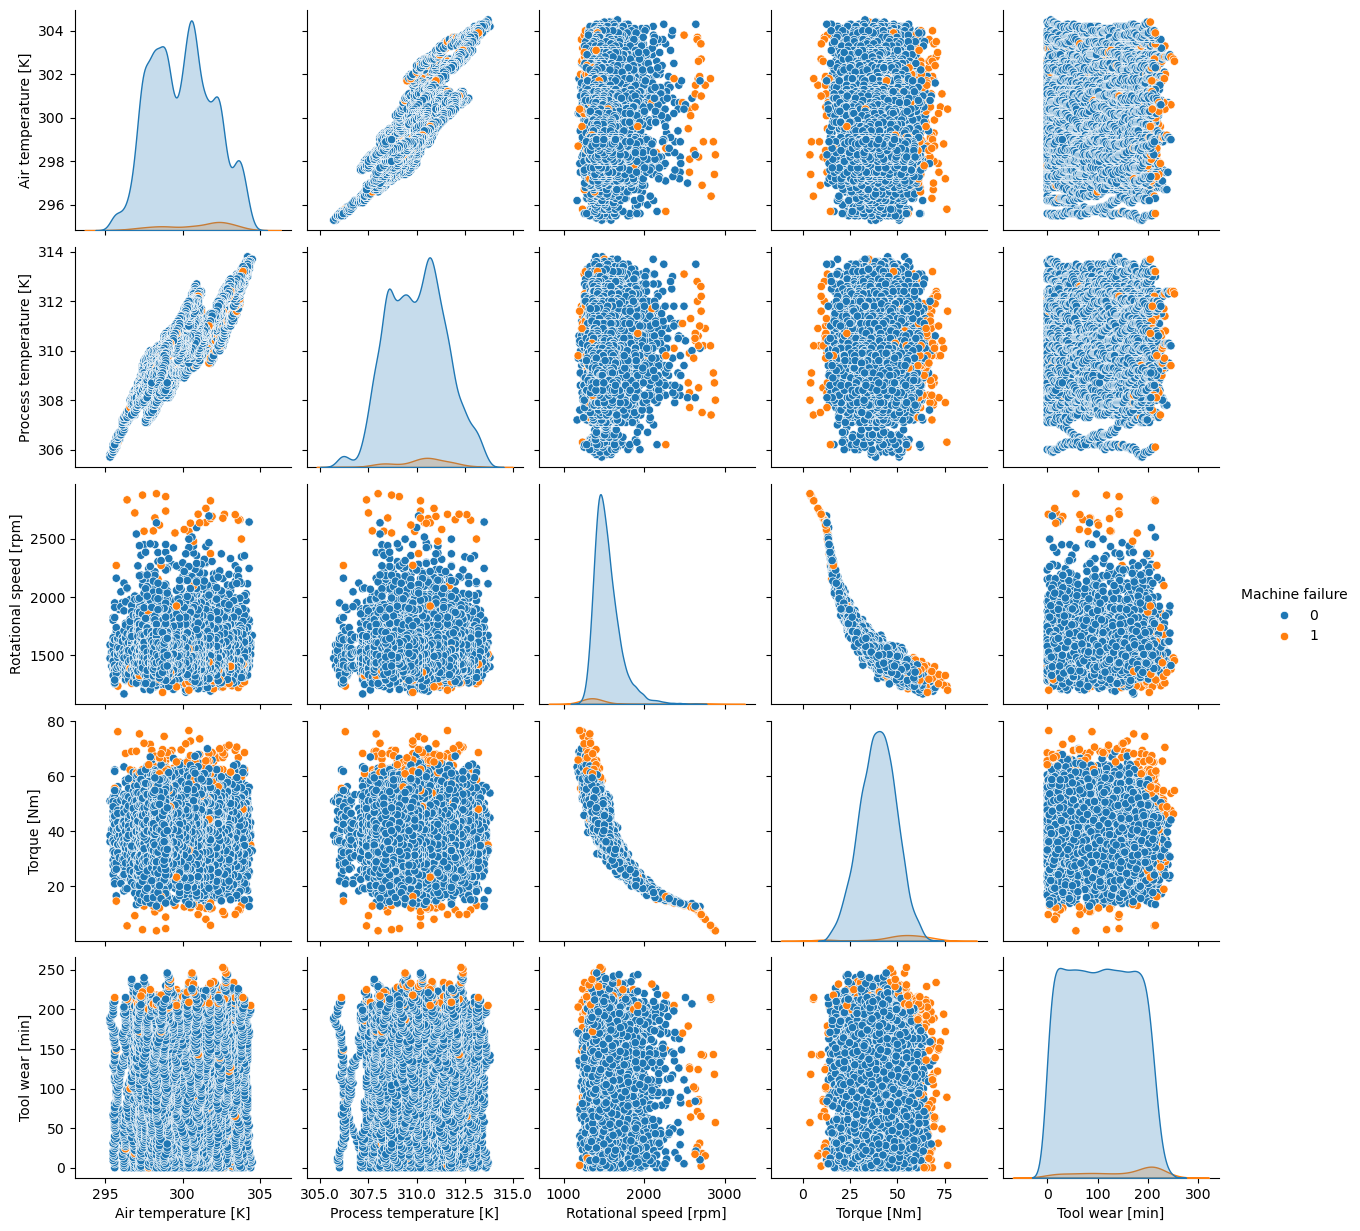

In [36]:
sns.pairplot(df2,hue="Machine failure")

# EDA FOR TYPES OF MACHINE FAILURE

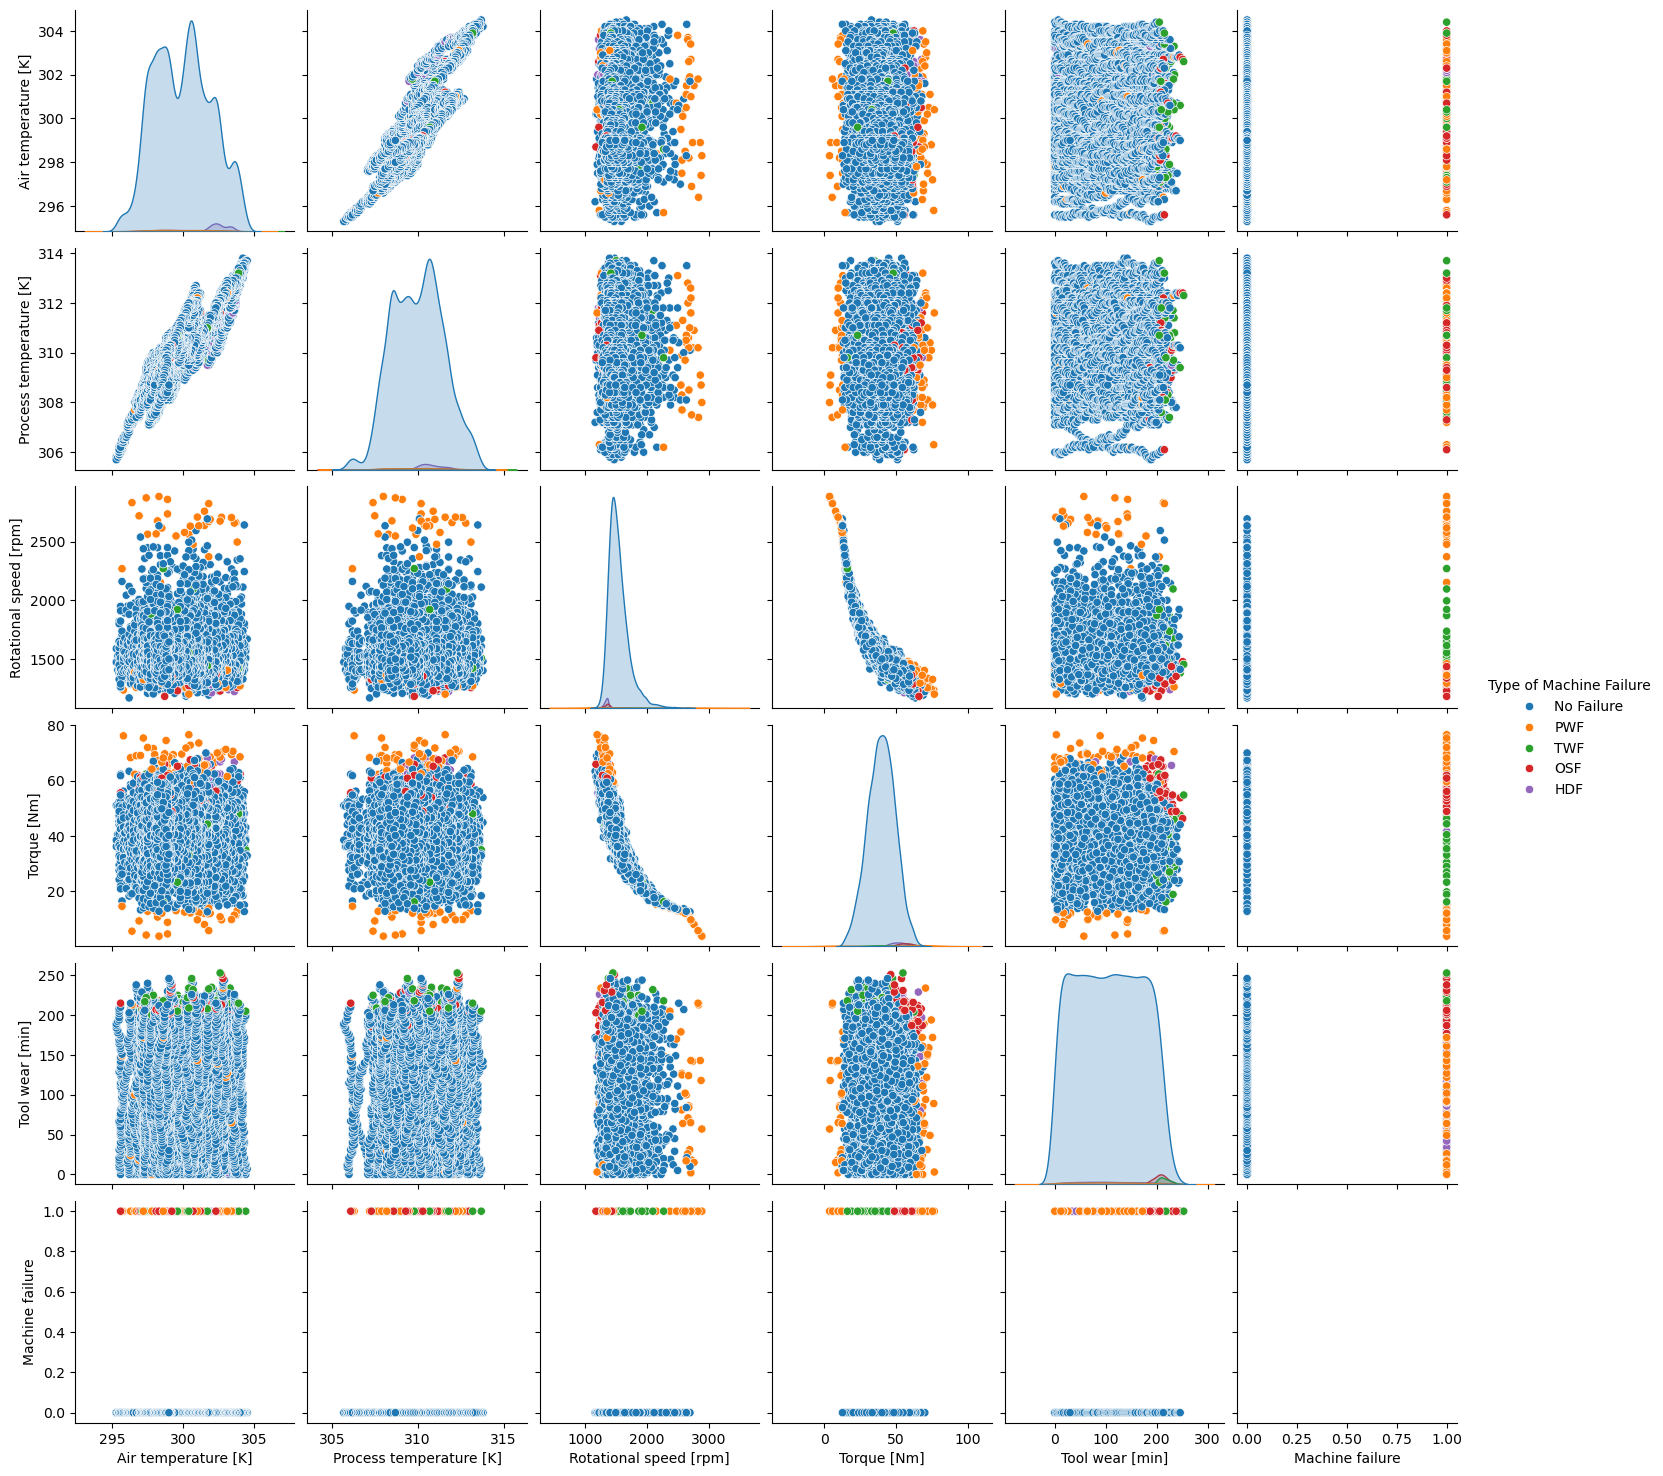

In [38]:
sns.pairplot(df2,hue="Type of Machine Failure")

# DATA SHEET

In [40]:
df2.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Type of Machine Failure
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


# EDA OF ROTATIONAL SPEED AND TORQUE

In [42]:
 df100=df2[["Rotational speed [rpm]","Torque [Nm]"]]

<Axes: xlabel='Rotational speed [rpm]', ylabel='Torque [Nm]'>

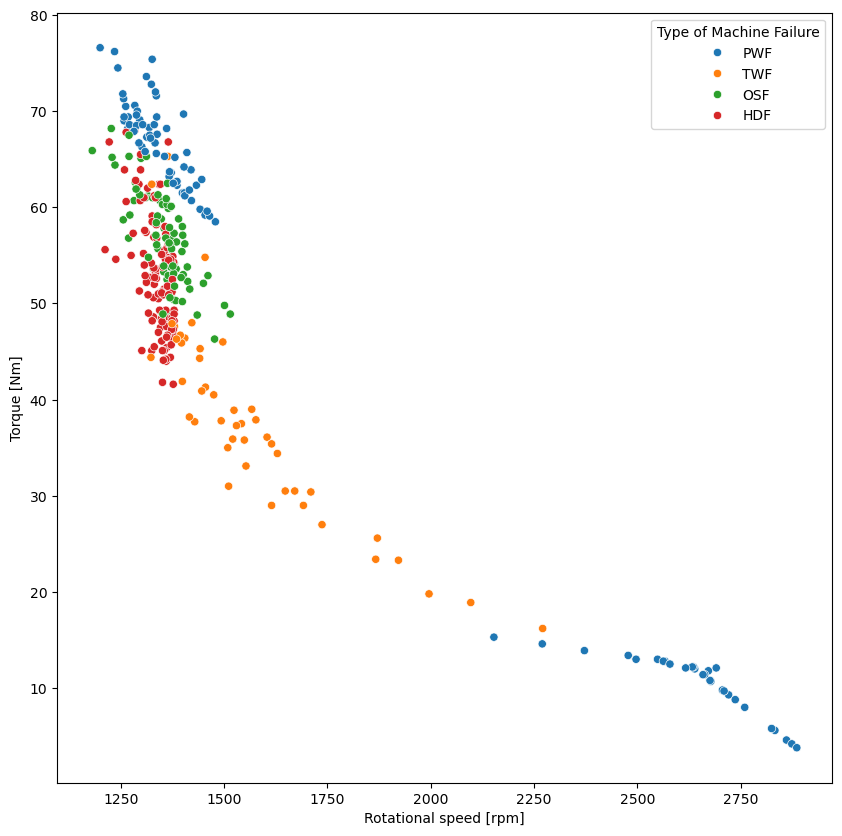

In [43]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df2[df2["Machine failure"]==1],x="Rotational speed [rpm]",y="Torque [Nm]",hue="Type of Machine Failure")

# CORRELATION BETWEEN COLUMNS

In [45]:
df2.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Type of Machine Failure
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


<Axes: >

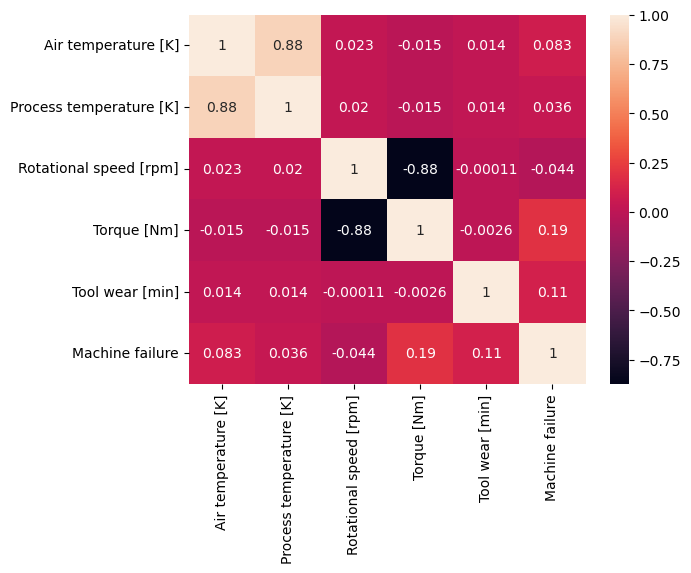

In [46]:


# Select only numeric columns for correlation
numeric_df = df2.select_dtypes(include=['number'])

# Calculate correlation and plot heatmap
sns.heatmap(numeric_df.corr(), annot=True)


# percentage of failure based on quality of components L, M, H

In [48]:
Low_quality=df2[df2["Type"]=="L"]
Low_quality

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Type of Machine Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure
6,L,298.1,308.6,1558,42.4,14,0,No Failure
...,...,...,...,...,...,...,...,...
9988,L,298.9,308.6,1771,24.1,213,0,No Failure
9990,L,298.8,308.5,1527,36.2,3,0,No Failure
9992,L,298.8,308.4,1484,39.2,8,0,No Failure
9993,L,298.8,308.4,1401,47.3,10,0,No Failure


In [49]:
Low_quality["Machine failure"].value_counts(normalize=True)*100

Machine failure
0    96.139706
1     3.860294
Name: proportion, dtype: float64

In [50]:
MEDIUM_quality=df2[df2["Type"]=="M"]
MEDIUM_quality["Machine failure"].value_counts(normalize=True)*100

Machine failure
0    97.358743
1     2.641257
Name: proportion, dtype: float64

In [51]:
HIGH_quality=df2[df2["Type"]=="H"]
HIGH_quality["Machine failure"].value_counts(normalize=True)*100

Machine failure
0    97.995992
1     2.004008
Name: proportion, dtype: float64

# ALTHOUGH THE LOW PRICE COMPONENT HAS FAILURE AMOUNT 3.86 WITH RESPECT TO MEDIUM 2.64 AND HIHG PRICE 2.00 , BUT THE DIFFERENCE IS NOT VERY HIGH

# FINDING THE OUTLIER

<Axes: xlabel='Torque [Nm]'>

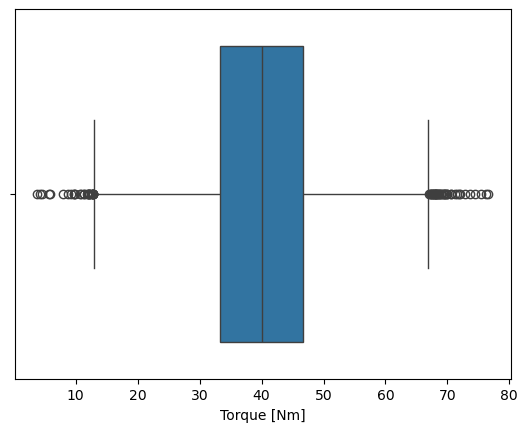

In [54]:
sns.boxplot(data=df2,x="Torque [Nm]")

<Axes: xlabel='Rotational speed [rpm]'>

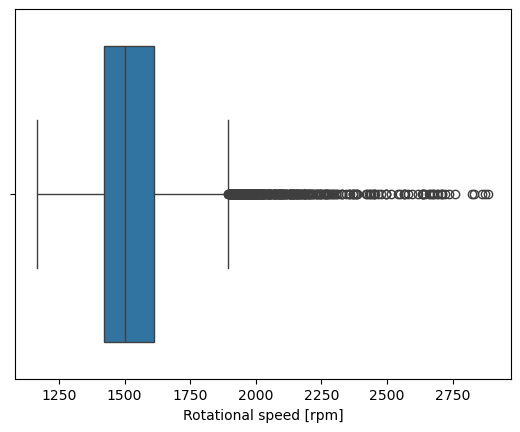

In [55]:
sns.boxplot(data=df2,x="Rotational speed [rpm]")

# Label Encoding

In [57]:
df2["Type"]=df2["Type"].map({"L":0,"M":1,"H":2})

In [58]:
df2["Type"].value_counts()

Type
0    5984
1    2991
2     998
Name: count, dtype: int64

# AFTER CLEANING THE DATA FILE

In [60]:
# Save df2 as a CSV file
df2.to_csv("cleaned_data.csv", index=False)


In [61]:
df2.describe()


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
count,9973.000000,9973.000000,9973.000000,9973.000000,9973.000000,9973.000000,9973.000000
mean,0.500050,300.003259,310.004031,1538.893212,39.978993,107.921087,0.033089
std,0.670959,2.000548,1.483692,179.412171,9.966805,63.649152,0.178879
min,0.000000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,0.000000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,0.000000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,1.000000,301.500000,311.100000,1612.000000,46.700000,162.000000,0.000000
max,2.000000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


# DROP THE PREDICTION COLUMN

In [63]:
from sklearn.feature_selection import chi2
# Drop the target columns from X
X = df2.drop(columns=["Machine failure", "Type of Machine Failure"], axis=1)

# Assign target columns to y
y = df2["Machine failure"]



In [64]:
df2.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Type of Machine Failure
0,1,298.1,308.6,1551,42.8,0,0,No Failure
1,0,298.2,308.7,1408,46.3,3,0,No Failure
2,0,298.1,308.5,1498,49.4,5,0,No Failure
3,0,298.2,308.6,1433,39.5,7,0,No Failure
4,0,298.2,308.7,1408,40.0,9,0,No Failure


# TRAIN TEST SPLIT

In [66]:
# import library
from sklearn.model_selection import train_test_split
# split the data into train, test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6981, 6), (2992, 6), (6981,), (2992,))

# Model Training

In [68]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

def classify(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 
    model.fit(X_train, y_train)   
    pred_test = model.predict(X_test)
    print("Testing Accuracy_Score is", accuracy_score(pred_test, y_test) * 100)
    
    # K-Fold Stratified Cross Validation:
    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    score = cross_val_score(model, X, y, cv=stratified_kfold)
    print("Accuracy using K-Fold Stratified Cross Validation is,", np.mean(score) * 100)


# Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Testing Accuracy_Score is 97.02540106951871
Accuracy using K-Fold Stratified Cross Validation is, 97.06200807937597


# DecisionTree

In [72]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Testing Accuracy_Score is 97.99465240641712
Accuracy using K-Fold Stratified Cross Validation is, 98.11491114948858


# Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model,X,y)

Testing Accuracy_Score is 98.49598930481284
Accuracy using K-Fold Stratified Cross Validation is, 98.55604909967998


# AdaBoost

In [76]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
classify(model,X,y)

Testing Accuracy_Score is 97.22593582887701
Accuracy using K-Fold Stratified Cross Validation is, 97.36285548374447


# KNeighbors

In [78]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=20)
classify(model,X,y)

Testing Accuracy_Score is 96.82486631016043
Accuracy using K-Fold Stratified Cross Validation is, 97.05201318240435


# Naive Bayes

In [80]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
classify(model,X,y)

Testing Accuracy_Score is 95.78877005347593
Accuracy using K-Fold Stratified Cross Validation is, 96.17954112965464


# Support Vector Machine

In [82]:
from sklearn import svm
model = svm.SVC(kernel='linear')
classify(model,X,y)

Testing Accuracy_Score is 96.99197860962568
Accuracy using K-Fold Stratified Cross Validation is, 97.09210840541675


# Confusion Matrix

In [84]:
from sklearn.metrics import confusion_matrix

def cf_matrix(model, X, y):
    model.fit(X_train, y_train)
    pred_test = model.predict(X_test)
    cm = confusion_matrix(pred_test, y_test)
    sns.heatmap(cm, annot = True, fmt = 'g')
    # Classification Report
    print(classification_report(pred_test,y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      2964
           1       0.20      0.75      0.32        28

    accuracy                           0.97      2992
   macro avg       0.60      0.86      0.65      2992
weighted avg       0.99      0.97      0.98      2992



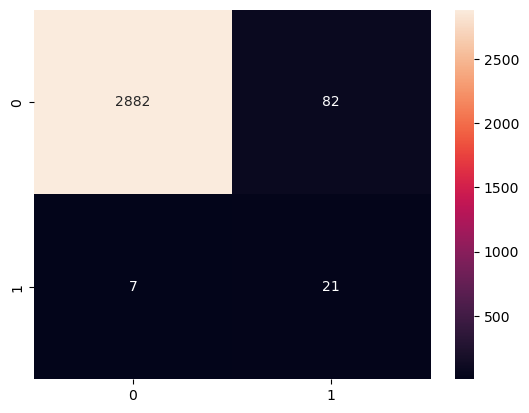

In [85]:
# Logistic Regression
model = LogisticRegression()
cf_matrix(model, X, y)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2907
           1       0.62      0.75      0.68        85

    accuracy                           0.98      2992
   macro avg       0.81      0.87      0.84      2992
weighted avg       0.98      0.98      0.98      2992



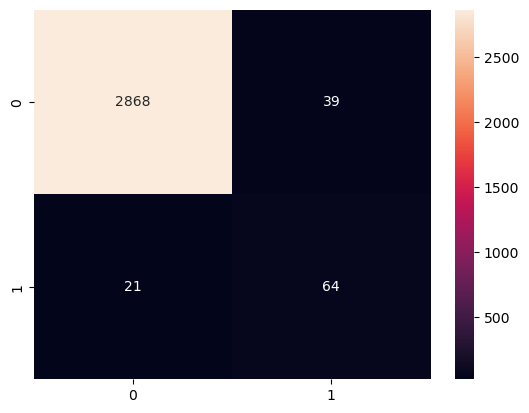

In [86]:
# Decision Tree Classifier
model = DecisionTreeClassifier()
cf_matrix(model, X, y)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2919
           1       0.62      0.88      0.73        73

    accuracy                           0.98      2992
   macro avg       0.81      0.93      0.86      2992
weighted avg       0.99      0.98      0.99      2992



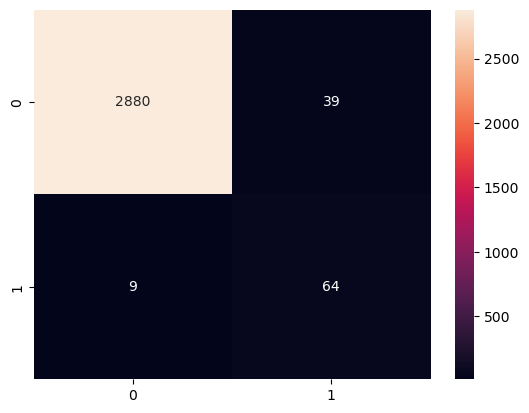

In [87]:
# Random Forest Classifier
model = RandomForestClassifier()
cf_matrix(model, X, y)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2934
           1       0.38      0.67      0.48        58

    accuracy                           0.97      2992
   macro avg       0.69      0.83      0.74      2992
weighted avg       0.98      0.97      0.98      2992



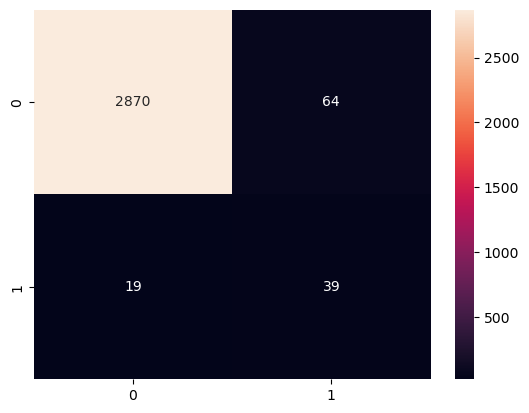

In [88]:
# Ada Boost Classifier
model = AdaBoostClassifier()
cf_matrix(model, X, y)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      2980
           1       0.10      0.83      0.17        12

    accuracy                           0.97      2992
   macro avg       0.55      0.90      0.58      2992
weighted avg       1.00      0.97      0.98      2992



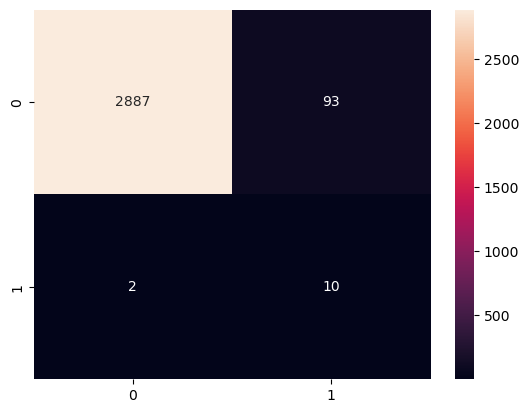

In [89]:
# KNeighbors Classifier
model = KNeighborsClassifier(n_neighbors=20)
cf_matrix(model, X, y)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2931
           1       0.18      0.31      0.23        61

    accuracy                           0.96      2992
   macro avg       0.58      0.64      0.61      2992
weighted avg       0.97      0.96      0.96      2992



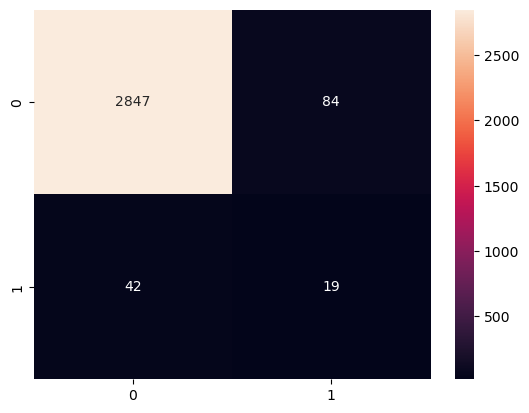

In [90]:
# Naive Bayes Classifier
model = GaussianNB()
cf_matrix(model, X, y)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      2977
           1       0.14      0.93      0.24        15

    accuracy                           0.97      2992
   macro avg       0.57      0.95      0.61      2992
weighted avg       1.00      0.97      0.98      2992



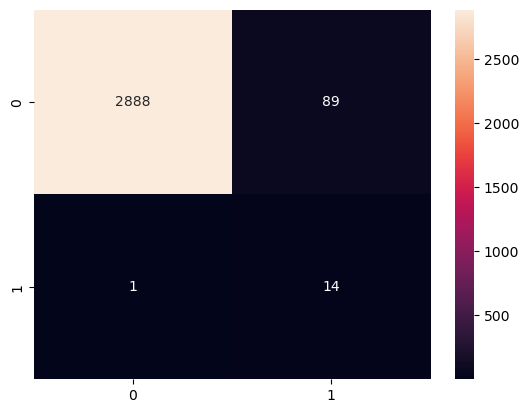

In [91]:
# Support Vector Classifier
model = svm.SVC(kernel='linear')
cf_matrix(model,X,y)

# Conclusion

Model Accuracies are:

1. Logistic Regression              97.06225
2. Desicion Tree Classifier         98.114701
3. Random Forest Classifier         98fier     4278
5. Ada Boost Classifier             97.5.417
6. KNeighbor Classifier             968.710
7. Naive Bayes Classif      ier     780.417
8. Support Vector           97.092  80.417

# Best Model Implementation

In [94]:
#lg_rg = LogisticRegression(solver= 'liblinear', penalty = 'l1', max_iter = 300, C = 1)
#lg_rg.fit(X,y)
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameters as a dictionary
hyperparameters = {
    'n_estimators': 900,
    'min_samples_split': 2,
    'min_samples_leaf': 10,
    'max_features': 'sqrt',
    'max_depth': 20
}

# Create the RandomForestClassifier instance with the specified hyperparameters
rf_cl = RandomForestClassifier(**hyperparameters)
rf_cl.fit(X, y)

RandomForestClassifier(max_depth=20, min_samples_leaf=10, n_estimators=900)

In [95]:
import pickle

# Save the model to a file
with open("Machine Failure.pkl", 'wb') as f:  # Open in write-binary mode
    pickle.dump(rf_cl, f)

print("Model saved successfully!")

# Load the model from a file
with open("Machine Failure.sav", 'rb') as f:  # Open in read-binary mode
    model = pickle.load(f)

print("Model loaded successfully!")

In [96]:
df3 = pd.DataFrame({'Type':1, 'Air temperature [K]':298.1, 'Process temperature [K]':308.6, 'Rotational speed [rpm]':1551, 'Torque [Nm]':42.8, 'Tool wear [min]':0},index = [0])

In [97]:
df3

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,1,298.1,308.6,1551,42.8,0


In [98]:
result = model.predict(df3)
if result == 1:
    print("Model Prediction: Machine Failed")
else:
    print("Model Prediction: Machine not Failed")

Model Prediction: Machine not Failed


In [99]:
df3 = pd.DataFrame({'Type':0, 'Air temperature [K]':298.9, 'Process temperature [K]':309.0, 'Rotational speed [rpm]':1410, 'Torque [Nm]':65.7, 'Tool wear [min]':191},index = [0])

In [100]:
result = model.predict(df3)
if result == 1:
    print("Model Prediction: Machine Failed")
else:
    print("Model Prediction: Machine not Failed")

Model Prediction: Machine Failed


In [178]:
# Filter rows where machine failure occurred for the second model
failure_data = df2[df2['Machine failure'] == 1]
X_failure_type = failure_data[['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
y_failure_type = failure_data['Type of Machine Failure']

X_train_type, X_test_type, y_train_type, y_test_type = train_test_split(X_failure_type, y_failure_type, test_size=0.2, random_state=42)

# Train Model 2: Type of Failure
failure_type_model = RandomForestClassifier(random_state=42)
failure_type_model.fit(X_train_type, y_train_type)

# Evaluate Model 2
y_pred_type = failure_type_model.predict(X_test_type)
print("\nType of Failure Prediction Accuracy:", accuracy_score(y_test_type, y_pred_type))

# Save the failure type model
# joblib.dump(failure_type_model, 'failure_type_model.pkl')

# Save the model to a file
with open("failure_type_model.pkl", 'wb') as t:  # Open in write-binary mode
    pickle.dump(failure_type_model, t)

print("Model saved successfully!")


Type of Failure Prediction Accuracy: 0.9393939393939394


['failure_type_model.pkl']

In [180]:
def predict_failure_and_type(data):
    """
    Predict machine failure and type of failure.
    
    Parameters:
        data (pd.DataFrame): Input data containing required features.

    Returns:
        pd.DataFrame: Predictions for machine failure and type of failure.
    """
    # Load models
    failure_model = pickle.load('Machine Failure.pkl')
    failure_type_model = pickle.load('failure_type_model.pkl')
    
    # Predict machine failure
    X = data[['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
    failure_predictions = failure_model.predict(X)
    
    # Initialize the result
    results = data.copy()
    results['predicted_machine_failure'] = failure_predictions
    results['predicted_failure_type'] = None
    
    # Predict type of failure where failure is predicted
    failure_indices = results[results['predicted_machine_failure'] == 1].index
    if not failure_indices.empty:
        failure_data = X.loc[failure_indices]
        type_predictions = failure_type_model.predict(failure_data)
        results.loc[failure_indices, 'predicted_failure_type'] = type_predictions

    return results


In [184]:
# Example usage with test data
test_data = pd.read_csv('cleaned_data.csv')
predictions = predict_failure_and_type(test_data)
print(predictions[['predicted_machine_failure', 'predicted_failure_type']])


      predicted_machine_failure predicted_failure_type
0                             0                   None
1                             0                   None
2                             0                   None
3                             0                   None
4                             0                   None
...                         ...                    ...
9968                          0                   None
9969                          0                   None
9970                          0                   None
9971                          0                   None
9972                          0                   None

[9973 rows x 2 columns]


In [190]:
df3 = pd.DataFrame({'Type':0, 'Air temperature [K]':298.9, 'Process temperature [K]':309.0, 'Rotational speed [rpm]':1410, 'Torque [Nm]':65.7, 'Tool wear [min]':191},index = [0])
predictions = predict_failure_and_type(df3)
print(predictions[['predicted_machine_failure', 'predicted_failure_type']])


   predicted_machine_failure predicted_failure_type
0                          1                    PWF
